<p>Example script to extract a time serie of the ETFVC EPS product over a domain<strong><br /></strong></p>

In [1]:
import datetime as dt 
import thredds_lsasaf_utils as tlu

In [2]:
# Change here your user credentials
server_user="xxx"
server_passwd="xxx"

# Change here the product details 
# Go to https://thredds.lsasvcs.ipma.pt/thredds/catalog/catalog.html
# Navigate selecting satelite, product, format, and data to find the product_path and product file name 
# This is an example for the MSG MTFVC product 
product_path="/EPS/ETFVC/NETCDF/"
product_fname="NETCDF4_LSASAF_M01-AVHR_ETFVC_GLOBE"
NcvarsLoad=['FVC'] # list of netcdf variables to load from remote files 
# time period to process 
dstart=dt.datetime(2020,1,1) #start slot 
dend=dt.datetime(2022,12,31)   # end slot  
product_freq="day15" # special case to load only day 15 of each month for monthly means 

## Define latitude/longitude domain to load [lat_min,lat_max,lon_min,lon_max,]
LatLonBox = [36,44,-10,3] # example for Iberian Peninsula 

In [3]:
# Initialize product details

product = tlu.lsa_product(product_path,product_fname)
product.user = server_user
product.passwd = server_passwd


# list of slots to be processed:
slot_list = tlu.gen_slot_list(dstart,dend,product_freq)
print(f"Will load:{len(slot_list)} files: {slot_list[0]} to {slot_list[-1]}")

# Load data 
ds_full = tlu.load_product_slots_domain(product,slot_list,NcvarsLoad,LatLonBox)


Will load:36 files: 2020-01-15 00:00:00 to 2022-12-15 00:00:00


Processing 2022-12-15 00:00:00: 100%|██████████████████████████████████████████████████| 36/36 [00:15<00:00,  2.30it/s]

Loaded 34 out of 36 slots with dims: Frozen({'time': 34, 'lat': 801, 'lon': 1301}) in 15.75 seconds 


<xarray.Dataset>
Dimensions:  (time: 34, lat: 801, lon: 1301)
Coordinates:
  * lat      (lat) float32 36.0 36.01 36.02 36.03 ... 43.97 43.98 43.99 44.0
  * lon      (lon) float32 -10.0 -9.99 -9.98 -9.97 -9.96 ... 2.97 2.98 2.99 3.0
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2022-12-15
Data variables:
    FVC      (time, lat, lon) float32 nan nan nan nan ... 0.5818 0.6191 0.6207
Attributes: (12/29)
    references:                      Data provided by the EUMETSAT Satellite ...
    easternmost_longitude:           -180.0
    westernmost_longitude:           179.989990234375
    spatial_resolution:               0.01x 0.01
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_resolution:        0.01
    geospatial_lon_resolution:        0.01
    northernmost_latitude:           90.0
    southernmost_latitude:           -90.0
    DODS.strlen:                     0
    DODS_EXTRA.Unlimited_Dimension:  time

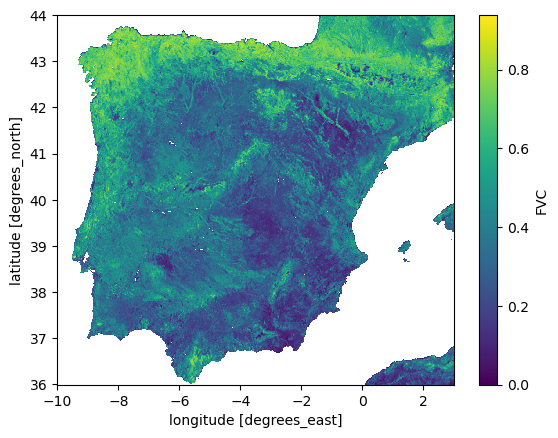

In [4]:
## plot map with temporal mean 
ds_full.mean(dim='time')[NcvarsLoad[0]].plot.imshow()

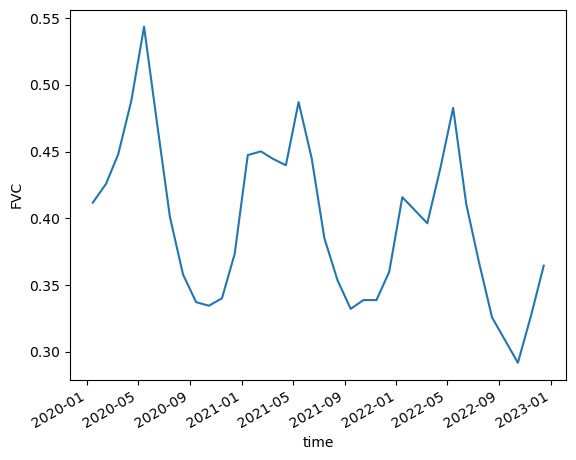

In [5]:
## plot temporal evolution, mean over the region
ds_full.mean(dim=['lat','lon'])[NcvarsLoad[0]].plot()

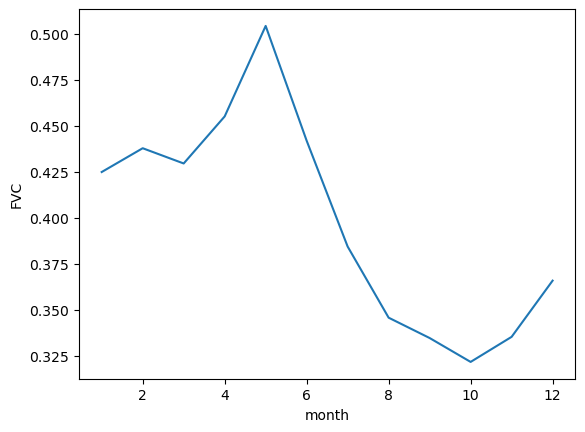

In [6]:
## plot mean annual cycle over the region 
ds_full.mean(dim=['lat','lon'])[NcvarsLoad[0]].groupby('time.month').mean('time').plot()